## Python_Assignment


In [1]:

from Bio import SeqIO

from Bio.Data import CodonTable

import pandas as pd


## Function

1. Document Dr. X's function with comments and with markdown text in your Jupyter notebook

In [2]:
def get_sequences_from_file(fasta_fn): # define a function to get sequences from fasta files
    sequence_data_dict = {} # create a dictionary
    for record in SeqIO.parse(fasta_fn, "fasta"): # start a for-loop over the records in the fasta file 
        description = record.description.split() # extract the unique elements
        species_name = description[1] + " " + description[2] # create species_name by extracting element 1 and space and then element 2 in discription
        sequence_data_dict[species_name] = record.seq # the dictionary contains "species_name" as key and sequence as value 
    return(sequence_data_dict) # reture to the sequense data dictionary

In [3]:
seq = get_sequences_from_file("bears_cytb.fasta")

In [4]:
from Bio.Data import CodonTable # import Codon table from Bio.Data
mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # get the codon table and name it mito_table
print(mito_table)

Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

2. Write a function that translates a string of nucleotides to amino acids based on Dr. X's pseudo-code suggestion.

In [5]:
def translate_function(string_nucleotides):
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # get codon table and name mito_table
    aa_seq_string = "" # set an empty string-type of "aa_seq_string"
    i = 0 # set value of element i to 0
    while i < len(string_nucleotides): # A while-loop goes on until the value of "i" is equal the length of the sequence defined by string_nucleotides
        codon = string_nucleotides[i:i+3] # Create "codon" containing string_nucleotides. A codon contains 3 nucleotides (from i to i+3)
        if (codon == 'TAG' or codon == 'TAA' or codon == 'AGA' or codon == 'AGG'):
            break  # stop the loop if a codon matches to one of the known "stop" codons
        aa = mito_table.forward_table[codon] # get the aa in mito_table that matches its codon
        aa_seq_string += aa # increase the aa_seq_string by adding aa
        i += 3 # value of element i is inceased by 3
    return(aa_seq_string)

In [6]:
translate_function("ATGACCAACATCCGAAAA") # test the translate_function

'MTNIRK'

In [ ]:
3. Write an alternative translation function

In [7]:
def translate_function_alt(nucleotides): # define translate_funtion_alt
    from Bio.Seq import Seq # import seq from Bio.Seq package
    seq = Seq(nucleotides)  # create seq sequence 
    aa_seq = seq.translate(table=2, to_stop=True) # translate seq by using transcription table and stop at stop codon
    return(str(aa_seq))


In [8]:
translate_function_alt("ATGACCAACATCCGAAAA") # test translation_function_alt

'MTNIRK'

4. Write a function that calculates the molecular weight of each amino acid sequence

In [9]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
def cal_molecular_weight(aa_seq):
    aa_seq_Analysed = ProteinAnalysis(aa_seq) # analyses sequence
    molecular_weight = aa_seq_Analysed.molecular_weight() # using molecular weight attribute to calculate weight
    return(molecular_weight)  # returning the molecular weight

In [10]:
cal_molecular_weight("MTNIRK") # test cal_molecular_weight function

761.9334

5. Write a function that computes the GC-content of each DNA sequence.

In [26]:
def gc_content(string_nucleotides):# another way for GC content
    count = 0
    for i in string_nucleotides:
        if (i == 'G' or i == 'C'):
            count += 1
    return(count / len(string_nucleotides)*100)

In [27]:
gc_content("ATGACCAACATCCGAAAA") #  test gc_content function

38.88888888888889

## Main part of the script

In [13]:
cytb_seqs = get_sequences_from_file("bears_cytb.fasta") 
bears_df = pd.read_csv("bears_mass.csv")
species_list = list(bears_df.species)


 6. Add two new columns to the bears DataFrame: (1) molecular weight and (2) GC content

In [14]:
import numpy as np
import pandas as pd
bears_df["molecular_weight"]='Non' # in bears_df data frame add columns "molecular_weight" and set value as Non
bears_df["GC_content"]='Non' # in bears_df data frame add columns "GC_content" and set value as Non
bears_df 

,species,mass,molecular_weight,GC_content
0,Ursus spelaeus,550.800,Non,Non
1,Ursus arctos,203.500,Non,Non
2,Ursus thibetanus,99.714,Non,Non
3,Melursus ursinus,100.030,Non,Non
4,Ursus americanus,110.560,Non,Non
5,Helarctos malayanus,47.020,Non,Non
6,Ailuropoda melanoleuca,118.200,Non,Non
7,Tremarctos ornatus,140.700,Non,Non
8,Ursus maritimus,425.100,Non,Non


7. Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content of each translated sequence and adds those data to DataFrame

In [28]:
molecular_weight = []
gc_content = []
    
for key, value in cytb_seqs.items(): #A for-loop through all elements of the cytb sequence
    DNA_seq = (str(value)) # get the DNA_seq 
    aa_seq = translate_function(DNA_seq) # translate DNA_seq and name as aa_seq
    
    molecular_weight.append(cal_molecular_weight(aa_seq)) # calculate the molecular weight 
    gc_content.append(gc_content2(DNA_seq)) # calculate the GC_contents

bears_df['molecular_weight'] = molecular_weight # add the molecular_weight into the molecular weight column in the bears_df data frame
bears_df['GC_content'] = gc_content  # add the GC_content into the molecular weight column in the bears_df data frame

print(bears_df)

                  species     mass  molecular_weight  GC_content
0          Ursus spelaeus  550.800        42458.7992   43.771930
1            Ursus arctos  203.500        42414.7435   43.771930
2        Ursus thibetanus   99.714        42306.6735   45.614035
3        Melursus ursinus  100.030        42551.9900   45.175439
4        Ursus americanus  110.560        42427.7439   43.947368
5     Helarctos malayanus   47.020        42560.8910   44.298246
6  Ailuropoda melanoleuca  118.200        42702.1845   40.789474
7      Tremarctos ornatus  140.700        42384.8266   44.385965
8         Ursus maritimus  425.100        42454.7873   44.298246


8. Plot a bar-chart of the mass with the x-axes labeled with species names.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Ursus spelaeus'),
  Text(1, 0, 'Ursus arctos'),
  Text(2, 0, 'Ursus thibetanus'),
  Text(3, 0, 'Melursus ursinus'),
  Text(4, 0, 'Ursus americanus'),
  Text(5, 0, 'Helarctos malayanus'),
  Text(6, 0, 'Ailuropoda melanoleuca'),
  Text(7, 0, 'Tremarctos ornatus'),
  Text(8, 0, 'Ursus maritimus')])

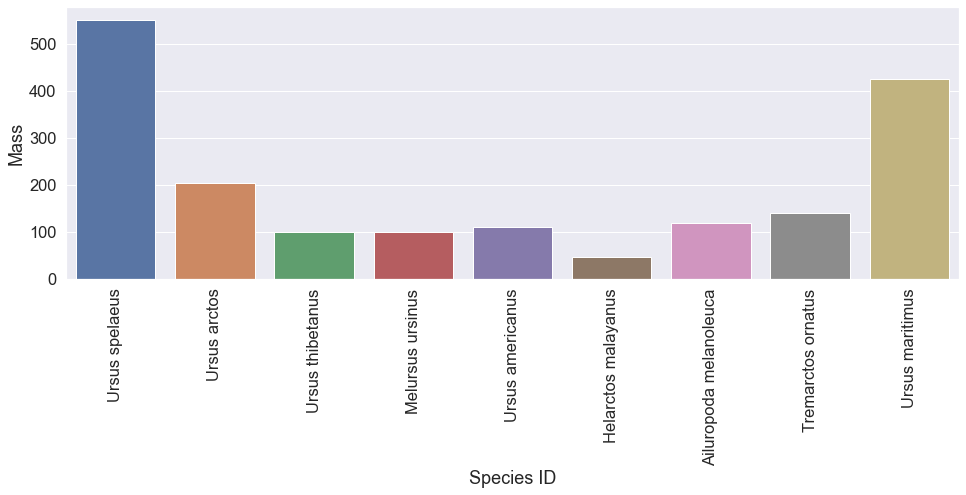

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

plot_dims = (16, 5)
sns.set(font_scale = 1.5)
fig, ax = plt.subplots(figsize=plot_dims)
sns.barplot(x = 'species', y = 'mass', data = bears_df)
ax.set(xlabel = 'Species ID', ylabel = 'Mass')
plt.xticks(rotation=90)


*Q1* What is the largest bear species? 
Ursus Spelaeus
*Q2* What else is interesting about this species?
#Ursus Spelaeus are found mainly in caves, therefore, they are called cave bears

9. Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).

C:\Users\giang nguyen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


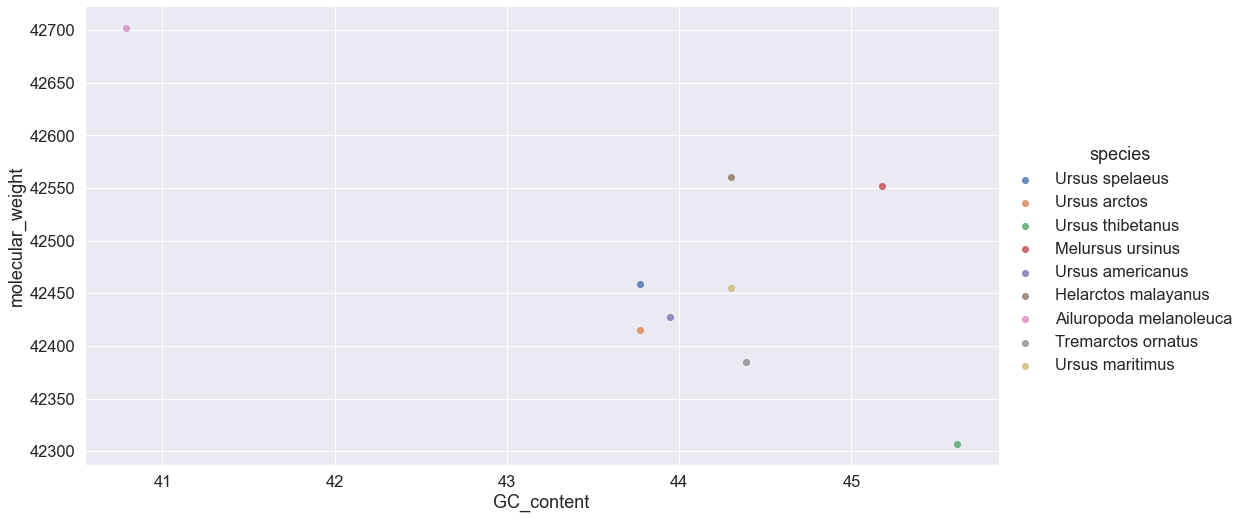

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
sns.lmplot( 'GC_content','molecular_weight', data = bears_df, fit_reg=False, height=7, aspect=2.0, hue="species")


10. Save the new DataFrame to a file called "bears_mass_cytb.csv"

In [31]:
bears_df.to_csv("bears_mass_cytb.csv", index = False)